<a href="https://colab.research.google.com/github/Solcito25/Trabajo-Final-de-IA/blob/main/Yolo_V5_Lama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Objetos en Imágenes


Se ha utilizado lo siguiente

*   Etiquetado de imágenes: Makesense.ia
*   Detector de Imágenes: YOLOV5



# Configuración

Clonar el repositorio, instalar dependencias y verificar PyTorch y GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


Se descomprime el archivo train_data.zip con las imagenes y labels, para entrenar y validar

In [ ]:
!unzip -q ../train_data.zip -d ../

Se entrena YOLOV5 con el archivo custom_data.yaml\\
En este archivo se encuentra:


*   Número de clases
*   Nombre de clases
*   Ruta de las imágenes a entrenar
*   Ruta de las imágenes a validar

Para los pesos se utilizan los proporcionados por YOLOV5





In [ ]:
# Train YOLOv5s on Lama Dataset for 60 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

# 1. Inferencia

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

En la sección de inferencia utilizamos los pesos obtenidos luego del entrenamiento y colocamos la ruta de la imagen

In [ ]:
!python detect.py --weights runs/train/exp4/weights/last.pt --img 640 --conf 0.25 --source ../lama.png


detect: weights=['runs/train/exp4/weights/last.pt'], source=../lama.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/lama.png: 448x640 8 lamas, Done. (0.016s)
Speed: 0.5ms pre-process, 16.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


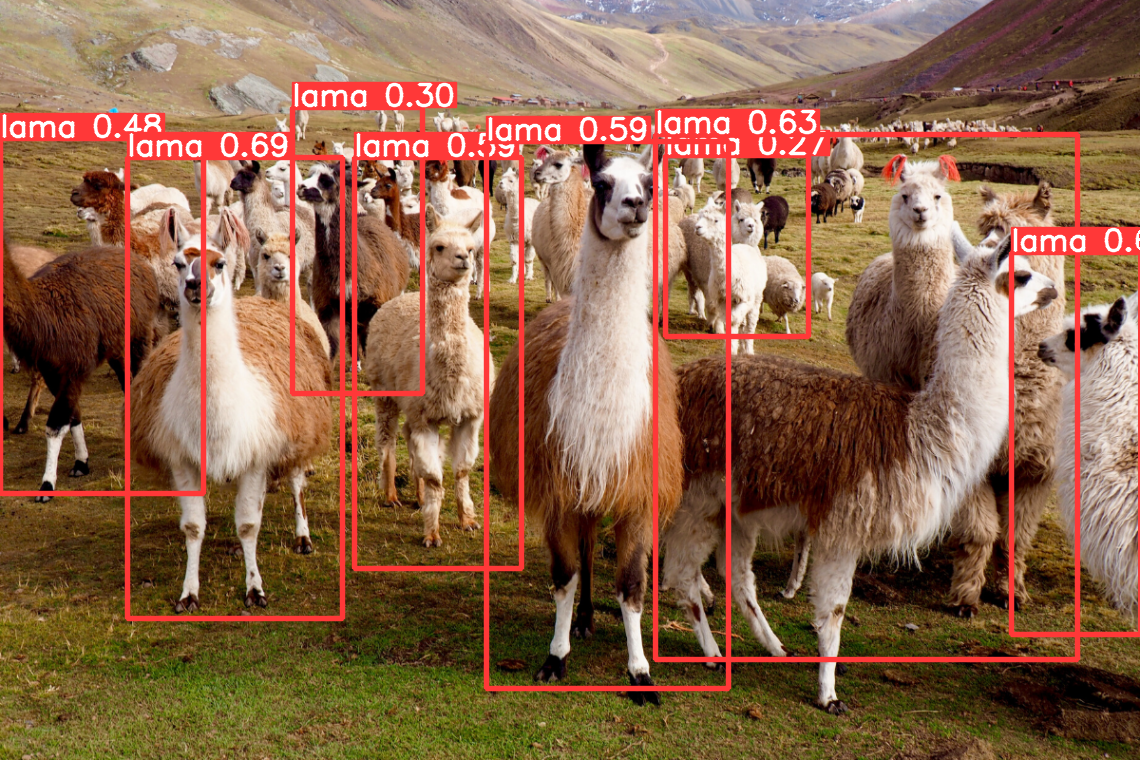

In [ ]:
display.Image(filename='runs/detect/exp5/lama.png', width=600)